In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set_theme()

### Sequential

In [ ]:
# COLUMNS:
    # N, time, steps, MLUP, MFLOPS, memory

x_gs = np.loadtxt('./results_gs.txt')
x_j  = np.loadtxt('./results_j.txt')

# update flops
x_j[:,4] = x_j[:,4]/x_j[:,1]
x_gs[:,4] = x_gs[:,4]/x_gs[:,1]

# Init figure
n = 4
fig, ax = plt.subplots(1,n, figsize=(12,3), dpi=150)

ylabel = ['Time [s]', 'Iterations','MLUP', 'MFLOPS']
titles = ["Running time", "Convergence",'MLUP', "MFLOPS"]
for i in range(n):
    ax[i].set_title(titles[i])
    ax[i].plot(x_gs[:,0], x_gs[:,i+1], label = 'Gauss Seidel')
    ax[i].plot(x_j[:,0], x_j[:,i+1], label = 'Jacobian')
    ax[i].set_xlabel('N')
    ax[i].set_ylabel(ylabel[i])
    ax[i].legend()
plt.tight_layout()
plt.savefig('Sequential')


### PARALLEL

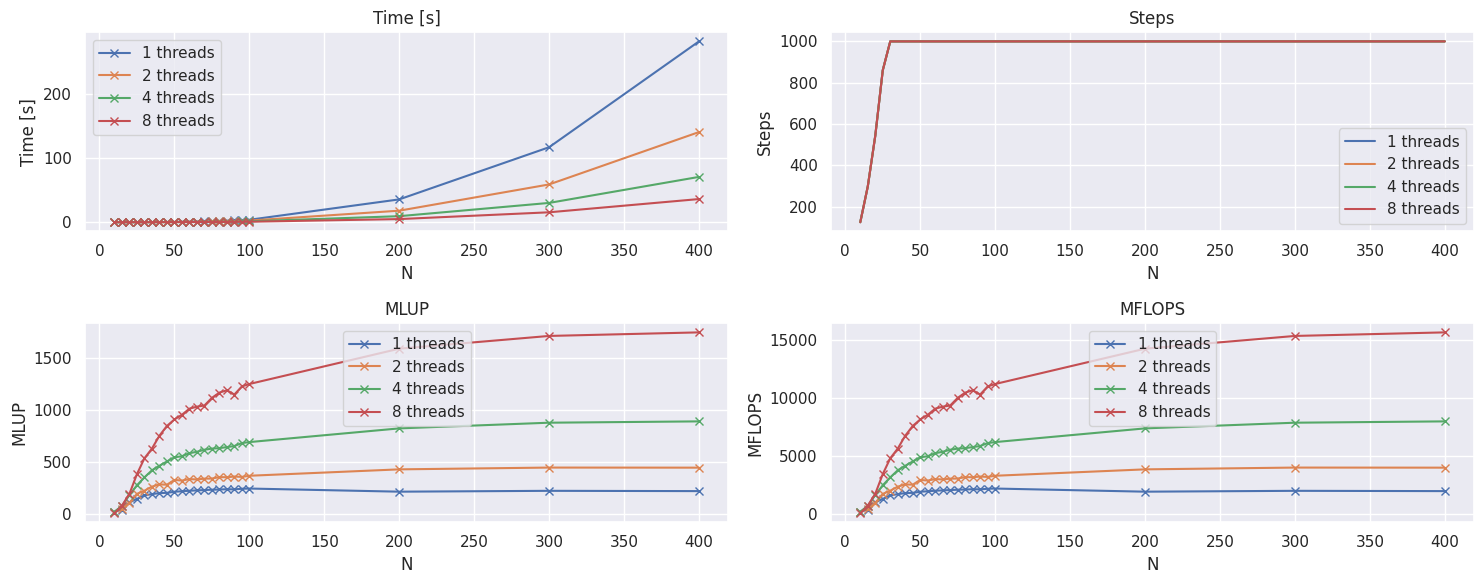

In [38]:
# COLUMNS:
    # N, time, steps, MLUP, MFLOPS, memory
filename=""
x_gs = np.loadtxt('results_poisson_gs_paral.txt', delimiter =',')


# Init figure
n = 4
fig, ax = plt.subplots(2,2, figsize=(15,6), dpi=100)

ylabel = ['Time [s]', 'Steps','MLUP', 'MFLOPS']
titles = ["Running time", "Convergence",'MLUP', "MFLOPS"]
locations = [(0,0),(0,1),(1,0),(1,1)]
for thread in [1,2,4,8]:
    data_gs = np.array([i for i in x_gs if i[-1]==thread])
    # print(data_gs.shape)
    # Time
    i = 0
    ax[0,0].set_title(ylabel[i])
    ax[0,0].plot(data_gs[:,0], data_gs[:,i+1], "-x",label = str(thread) + ' threads')
    ax[0,0].set_xlabel('N')
    ax[0,0].set_ylabel(ylabel[i])
    ax[0,0].legend()
    # Iterations
    i = 1
    ax[0,1].set_title(ylabel[i])
    ax[0,1].plot(data_gs[:,0], data_gs[:,i+1], "-",label = str(thread) + ' threads')
    ax[0,1].set_xlabel('N')
    ax[0,1].set_ylabel(ylabel[i])
    ax[0,1].legend()
    # MLups
    i=2
    ax[1,0].set_title(ylabel[i])
    ax[1,0].plot(data_gs[:,0], data_gs[:,i+1],"-x", label = str(thread) + ' threads')
    ax[1,0].set_xlabel('N')
    ax[1,0].set_ylabel(ylabel[i])
    ax[1,0].legend()
    # MFlops
    i=3
    ax[1,1].set_title(ylabel[i])
    ax[1,1].plot(data_gs[:,0], data_gs[:,i+1],"-x", label = str(thread) + ' threads')
    ax[1,1].set_xlabel('N')
    ax[1,1].set_ylabel(ylabel[i])
    ax[1,1].legend()

plt.tight_layout()


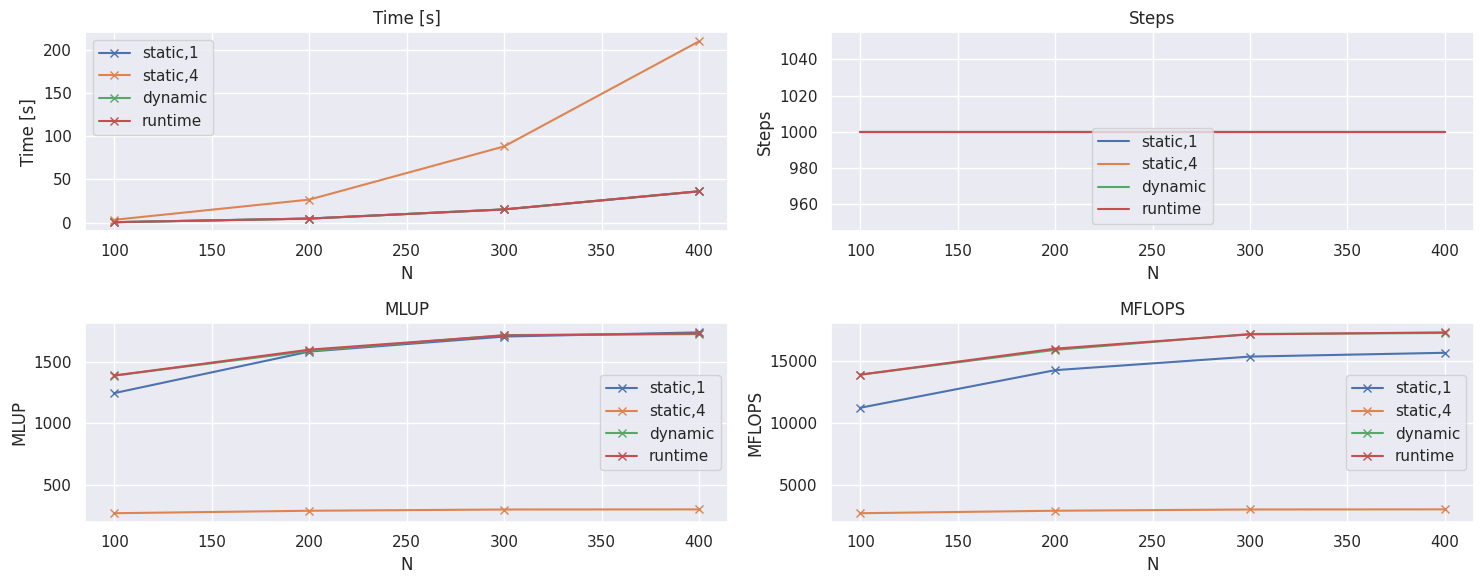

In [46]:
# COLUMNS:
    # N, time, steps, MLUP, MFLOPS, memory
filename=""
x_gs = np.loadtxt('results_poisson_gs_paral_static4.txt', delimiter =',')


# Init figure
n = 4
fig, ax = plt.subplots(2,2, figsize=(15,6), dpi=100)

ylabel = ['Time [s]', 'Steps','MLUP', 'MFLOPS']
titles = ["Running time", "Convergence",'MLUP', "MFLOPS"]
lables = ['static,1','static,4', 'dynamic', "runtime"]
locations = [(0,0),(0,1),(1,0),(1,1)]

for thread in [0,1,2,3]:
    data_gs = np.array([i for i in x_gs if i[-1]==thread])
    # print(data_gs.shape)
    # Time
    i = 0
    ax[0,0].set_title(ylabel[i])
    ax[0,0].plot(data_gs[:,0], data_gs[:,i+1], "-x",label = f"{lables[thread]}")
    ax[0,0].set_xlabel('N')
    ax[0,0].set_ylabel(ylabel[i])
    ax[0,0].legend()
    # Iterations
    i = 1
    ax[0,1].set_title(ylabel[i])
    ax[0,1].plot(data_gs[:,0], data_gs[:,i+1], "-",label = f"{lables[thread]}")
    ax[0,1].set_xlabel('N')
    ax[0,1].set_ylabel(ylabel[i])
    ax[0,1].legend()
    # MLups
    i=2
    ax[1,0].set_title(ylabel[i])
    ax[1,0].plot(data_gs[:,0], data_gs[:,i+1],"-x", label = f"{lables[thread]}")
    ax[1,0].set_xlabel('N')
    ax[1,0].set_ylabel(ylabel[i])
    ax[1,0].legend()
    # MFlops
    i=3
    ax[1,1].set_title(ylabel[i])
    ax[1,1].plot(data_gs[:,0], data_gs[:,i+1],"-x", label = f"{lables[thread]}")
    ax[1,1].set_xlabel('N')
    ax[1,1].set_ylabel(ylabel[i])
    ax[1,1].legend()

plt.tight_layout()


In [35]:
# memory caculation
cubes=2
b2B = 64/8
N=100
points = N**2

memory = cubes*points*b2B
print(f"memory: {memory} B")
print(f"memory: {memory*1e-3} KB")
print(f"memory: {memory*1e-6} MB")

memory: 160000.0 B
memory: 160.0 KB
memory: 0.16 MB
